In [1]:
# Užkraunami duomenys
import pandas as pd

file_path = "dataset_heart.csv"
df = pd.read_csv(file_path)
df.head()


,Amžius,Lytis,Krūtinės skausmo tipas,Kraujospūdis ramybės būsenoje,Cholesterolio koncentracija kraujyje,Cukrus kraujyje nevalgius,Elektrokardiografijos rezultatai ramybės būsenoje,Maksimalus širdies susitraukimų dažnis,Fizinio krūvio sukelta krūtinės angina,ST depresija,ST segmentas,Pagrindinės kraujagyslės,Talis,Širdies liga
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


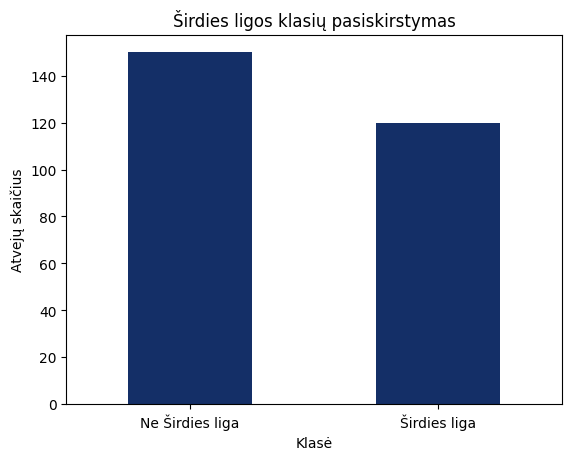

Širdies liga
1    150
2    120
Name: count, dtype: int64

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'dataset_heart.csv'
df = pd.read_csv(file_path)

df.head()

class_distribution = df['Širdies liga'].value_counts() 
class_distribution.plot(kind='bar', color=['#142f67', '#142f67'])

plt.title('Širdies ligos klasių pasiskirstymas')
plt.xlabel('Klasė')
plt.ylabel('Atvejų skaičius')
plt.xticks([0, 1], ['Ne Širdies liga', 'Širdies liga'], rotation=0)
plt.show()
heart_disease_counts = df['Širdies liga'].value_counts()

heart_disease_counts


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=["Širdies liga"]) 
y = df["Širdies liga"]  

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=56)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7222222222222222,
 '              precision    recall  f1-score   support\n\n           1       0.76      0.83      0.79        35\n           2       0.62      0.53      0.57        19\n\n    accuracy                           0.72        54\n   macro avg       0.69      0.68      0.68        54\nweighted avg       0.71      0.72      0.72        54\n')

In [4]:
# Mokymo ir testavimo duomenų pasiskirstymas
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

print("Training set distribution:")
print(f"Širdies liga: {train_counts[2]} atvejų")
print(f"Ne Širdies liga: {train_counts[1]} atvejų")

print("\nTest set distribution:")
print(f"Širdies liga: {test_counts[2]} atvejų")
print(f"Ne Širdies liga: {test_counts[1]} atvejų")


Training set distribution:
Širdies liga: 101 atvejų
Ne Širdies liga: 115 atvejų

Test set distribution:
Širdies liga: 19 atvejų
Ne Širdies liga: 35 atvejų


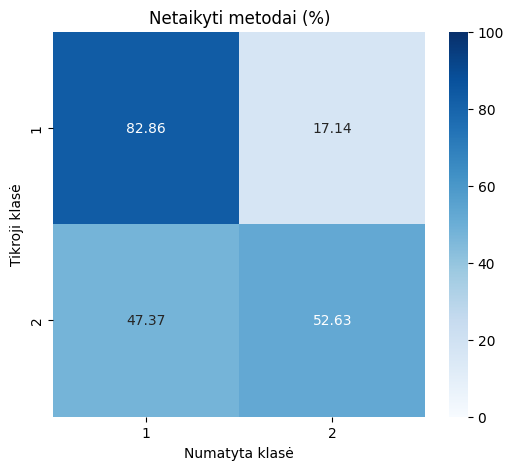

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("Netaikyti metodai (%)")
#plt.savefig("ori_heart.png", dpi=300, bbox_inches='tight')
plt.show()



In [6]:
# Patikrinamas mažumos ir daugumos klasių santykis
class_distribution = y.value_counts(normalize=True) * 100

class_distribution


Širdies liga
1    55.555556
2    44.444444
Name: proportion, dtype: float64

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


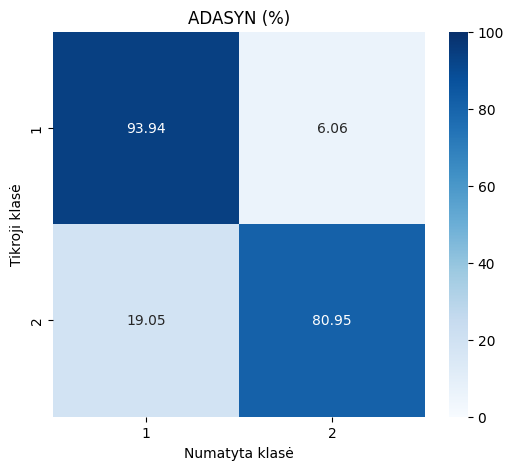

In [7]:
# Su originaliais širdies ligos duomenimis pritaikomas ADASYN
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

mlp_resampled = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_resampled.fit(X_train_resampled, y_train_resampled)

y_pred = mlp_resampled.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("ADASYN (%)")
#plt.savefig("ori_heart_adasyn.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


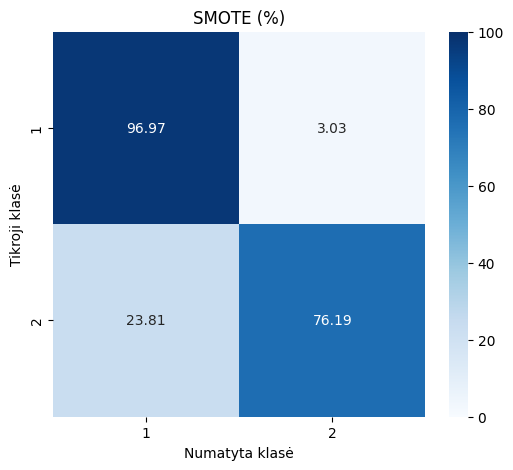

In [8]:
# Su originaliais širdies ligos duomenimis pritaikomas SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

mlp_smote = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_smote.fit(X_train_smote, y_train_smote)

y_pred = mlp_smote.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("SMOTE (%)")
#plt.savefig("ori_heart_smote.png", dpi=300, bbox_inches='tight')
plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


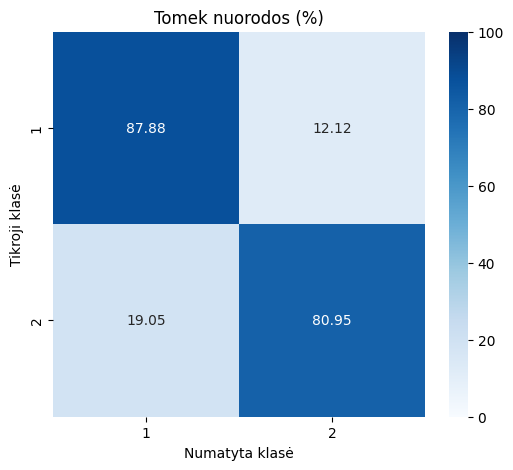

In [9]:
# Su originaliais širdies ligos duomenimis pritaikomos Tomek nuorodos

from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

mlp_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_tomek.fit(X_train_tomek, y_train_tomek)

y_pred = mlp_tomek.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("Tomek nuorodos (%)")
#plt.savefig("ori_heart_tomek.png", dpi=300, bbox_inches='tight')

plt.show()


/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


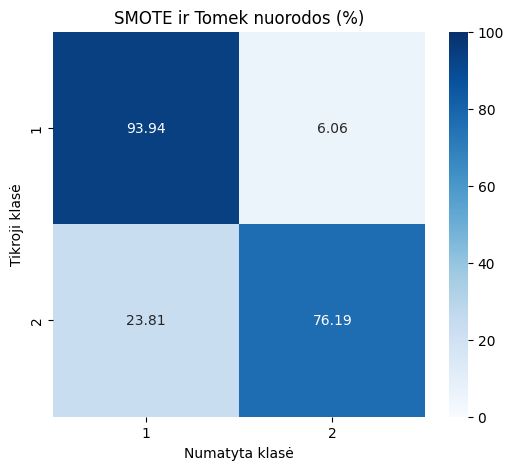

In [10]:
# Su originaliais širdies ligos duomenimis pritaikoma SMOTE ir Tomek nuorodos

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

y_pred = mlp_smotetomek.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("SMOTE ir Tomek nuorodos (%)")
#plt.savefig("ori_heart_smote_tomek.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


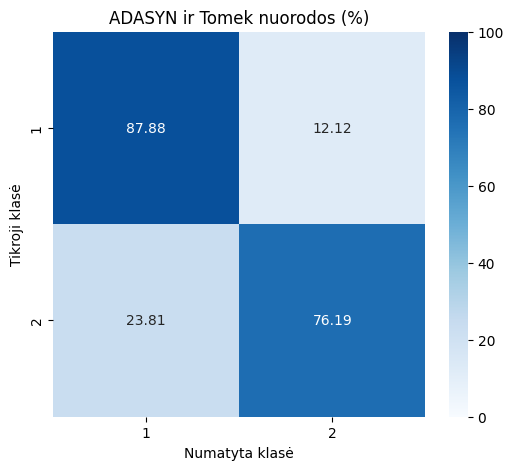

In [11]:
# Su originaliais širdies ligos duomenimis pritaikoma ADASYN ir Tomek nuorodos

from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

mlp_adasyn_tomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_adasyn_tomek.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)

y_pred = mlp_adasyn_tomek.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("ADASYN ir Tomek nuorodos (%)")
#plt.savefig("ori_heart_adasyn_tomek.png", dpi=300, bbox_inches='tight')

plt.show()


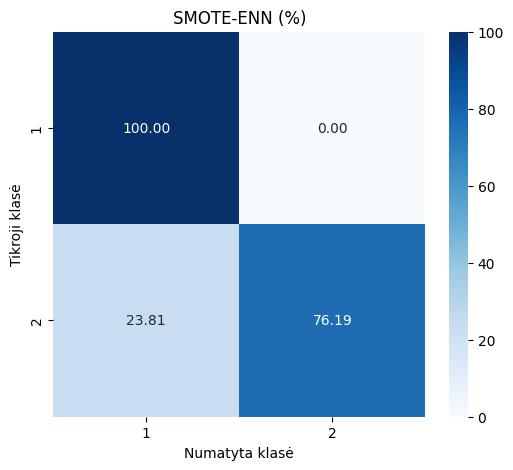

In [12]:
# Su originaliais širdies ligos duomenimis pritaikomas SMOTE-ENN

from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smotetomek = SMOTEENN(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

y_pred = mlp_smotetomek.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("SMOTE-ENN (%)")
#plt.savefig("ori_heart_smote-enn.png", dpi=300, bbox_inches='tight')
plt.show()

/Users/augustestriogaite/Downloads/Class_imbalance_MLP-main/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


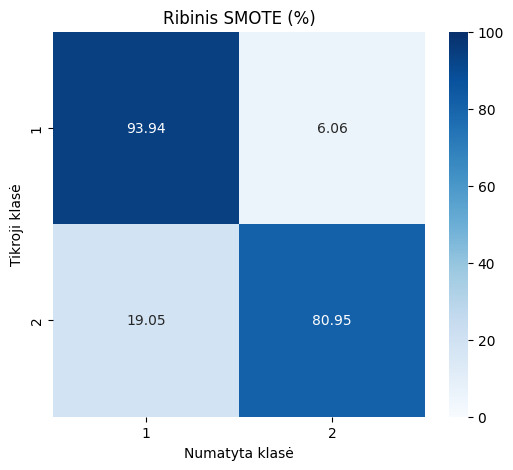

In [13]:
# Su originaliais širdies ligos duomenimis pritaikomas ribinis SMOTE

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import BorderlineSMOTE

import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

smotetomek = BorderlineSMOTE(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=3)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

y_pred = mlp_smotetomek.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_percentage,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    vmin=0,       
    vmax=100,      
    xticklabels=encoder.classes_,
    yticklabels=encoder.classes_
)
plt.xlabel("Numatyta klasė")
plt.ylabel("Tikroji klasė")
plt.title("Ribinis SMOTE (%)")
#plt.savefig("ori_heart_borderline_smote.png", dpi=300, bbox_inches='tight')
plt.show()